In [1]:
#!pip install keras-vggface

In [2]:
#!pip install opencv-python
#!pip install --user tqdm

In [3]:
#!pip install tensorflow --upgrade --force-reinstall
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/pkg.7/python3/3.8.10/install/bin/python3.8 -m pip install --upgrade pip' command.


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np
#import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np

import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt

# load dataset


In [21]:
base_path = './140K-data/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.,validation_split = 0.1)
batch_size = 64
image_size = (224,224)
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    #subset = 'validation'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    #subset = 'validation'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary',
   # subset = 'validation'
)

Found 100000 images belonging to 2 classes.
Found 10576 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


# Custom Architecture

In [22]:
#!pip uninstall tf-nightly
#!pip uninstall tf-estimate-nightly
#!pip install tensorflow -upgrade –force-reinstall
#!pip install tensorflow==2.1.0
#!pip install tensorflow --upgrade --force-reinstall

In [23]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
activation2 = 'softplus'
padding = 'same'
droprate = 0.05
droprate2 =0.15
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=8, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate2))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate2))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=8, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate2))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
          
#model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_14 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 112, 112, 8)       32        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 32)      2336      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 56, 56, 32)       

# Model Visualization

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/pkg.7/python3/3.8.10/install/bin/python3.8 -m pip install --upgrade pip' command.


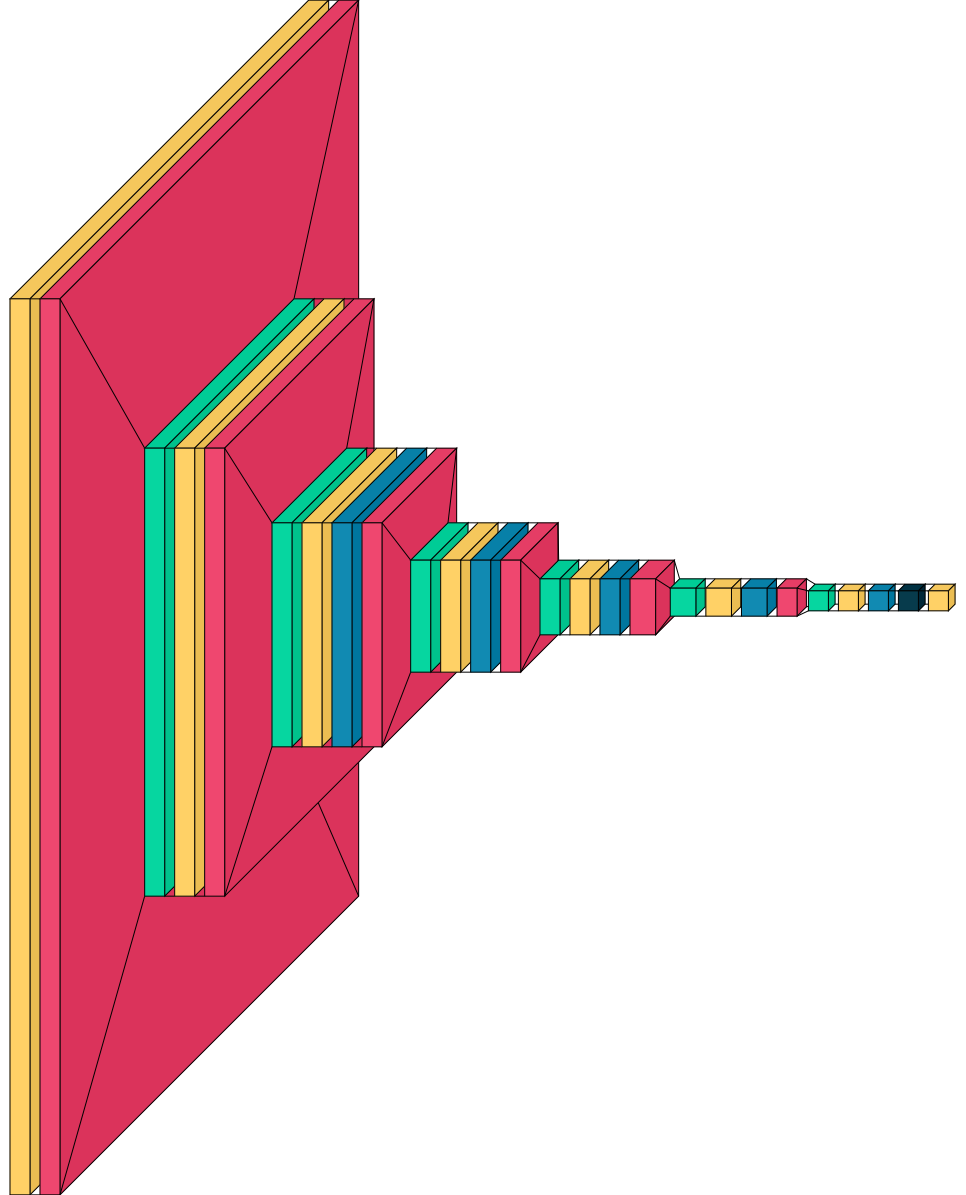

In [24]:
!pip install visualkeras
import visualkeras

#model = ...

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

# Model Compile

In [25]:
# Parameters Initialization
#from keras.optimizers import RMSprop,SGD,Adam,Adadelta
#import tf.keras.optimizers

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])

# Train Custom Model

In [26]:
#from tensorflow.python.client import device_lib 
#print(device_lib.list_local_devices())

In [27]:
train_steps = 80000//batch_size
valid_steps = 10000//batch_size
history = model.fit_generator(
    train_flow,
    epochs=10,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/10
1250/1250 [==============================] - 350s 280ms/step - loss: 0.5438 - accuracy: 0.7243 - val_loss: 0.2925 - val_accuracy: 0.8910
Epoch 2/10
1250/1250 [==============================] - 244s 195ms/step - loss: 0.4074 - accuracy: 0.8177 - val_loss: 0.1777 - val_accuracy: 0.9365
Epoch 3/10
1250/1250 [==============================] - 222s 178ms/step - loss: 0.3183 - accuracy: 0.8659 - val_loss: 0.1089 - val_accuracy: 0.9594
Epoch 4/10
1250/1250 [==============================] - 217s 174ms/step - loss: 0.2597 - accuracy: 0.8951 - val_loss: 0.1177 - val_accuracy: 0.9572
Epoch 5/10
1250/1250 [==============================] - 214s 171ms/step - loss: 0.2138 - accuracy: 0.9155 - val_loss: 0.0853 - val_accuracy: 0.9670
Epoch 6/10
1250/1250 [==============================] - 218s 175ms/step - loss: 0.1807 - accuracy: 0.9296 - val_loss: 0.0642 - val_accuracy: 0.9743
Epoch 7/10
1250/1250 [==============================] - 213s 170ms/step - loss: 0.1542 - accuracy: 0.9416 - val_

In [30]:
model.save("523CustomCNN.h5") # save model

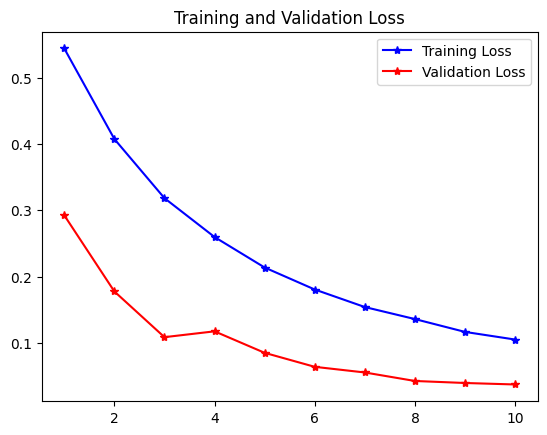

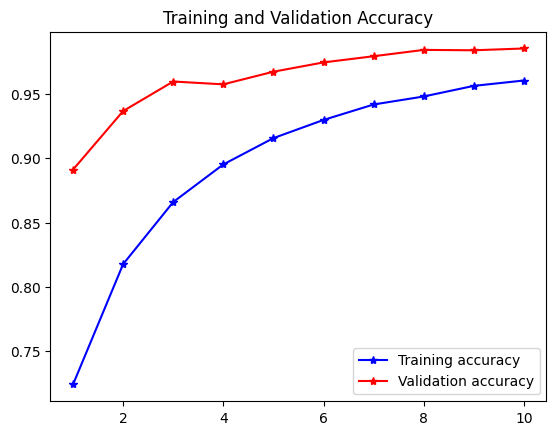

In [31]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, '*-b', label='Training Loss')
    plt.plot(epochs, val_loss, '*-r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, '*-b', label='Training accuracy')
    plt.plot(epochs, val_acc, '*-r', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

# Predict and Evaluate

In [32]:
print(model.metrics_names)
test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split = 0.8)
testpath = './140K-data/real_vs_fake/real-vs-fake/'

eval_generator = test_datagen.flow_from_directory(testpath + 'test/',
                                                  target_size=image_size,
                                                  batch_size=1,
                                                  shuffle=True,
                                                  seed=42,
                                                  class_mode="binary",
                                                  #subset = 'validation'
                                                 )
eval_generator.reset()
print(len(eval_generator))
#x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                          # use_multiprocessing = False,verbose = 1,workers=1)
x = model.evaluate(eval_generator)

print('Test loss:' , x[0])
print('Test accuracy:',x[1])
print(model.metrics_names)

['loss', 'accuracy']
Found 20000 images belonging to 2 classes.
20000
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1952 - accuracy: 0.9177
Test loss: 0.19515937566757202
Test accuracy: 0.9176999926567078
['loss', 'accuracy']


In [33]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [34]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.9950589099999999
AP Score: 0.9946035554552001

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10000
           1       0.99      0.84      0.91     10000

    accuracy                           0.92     20000
   macro avg       0.93      0.92      0.92     20000
weighted avg       0.93      0.92      0.92     20000



Found 70 images belonging to 2 classes.
70/70 [==============================] - 0s 2ms/step
(70, 1)
(70, 2)
35
35
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


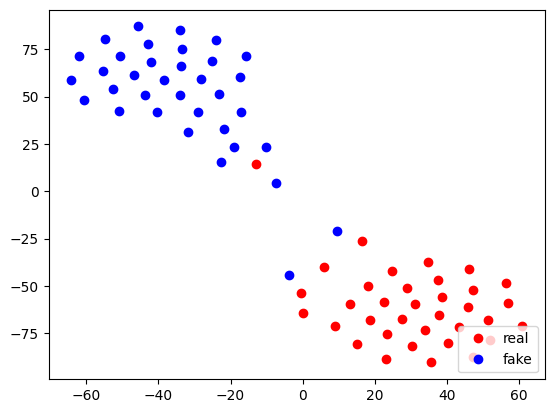

In [56]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_2').output)

newDataGen = ImageDataGenerator(rescale=1. / 255, validation_split = 0.0035)

tsne_eval_generator = newDataGen.flow_from_directory(base_path+'test/',target_size=image_size,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary", subset = 'validation')

    
pred = intermediate_layer_model.predict_generator(tsne_eval_generator,70,verbose=1)
print(pred.shape)
features = TSNE(n_components=2).fit_transform(pred)
print(features.shape)

x1,x2,y1,y2 = [],[],[],[]
cls = tsne_eval_generator.classes
sumA = 0 
sumB = 0
for i in cls:
    if i ==0:
        sumA+=1
    else:
        sumB+=1
        
print(sumA)
print(sumB)
print(cls)
for i in range(len(features)):
    if cls[i] == 0: 
        x1.append(features[i, 0])
        y1.append(features[i, 1])    
    else:
        x2.append(features[i, 0])
        y2.append(features[i, 1])

plt.figure()
plt.plot(x1, y1, 'ro', label="real")
plt.plot(x2, y2, 'bo', label="fake")
plt.legend(loc='lower right')